In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'price_position'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：价格位置因子（price_position）   
因子定义：根据时间窗口$\delta_t$的移动，移动步长为1个时间单位，当前价格$price_t$在时间窗口内最大最小值的位置。
$$
factor = \frac{price_t}{max(price_{t-\delta_t+1},price_{t-\delta_t+2},...,price_{t})+min(price_{t-\delta_t+1},price_{t-\delta_t+2},...,price_{t})}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : price_position
fields : ['close']
other_dIepend_factors : None
calc_params : {'delta_period': 5}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [0.2885714258466448, 0.6747656263480893]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

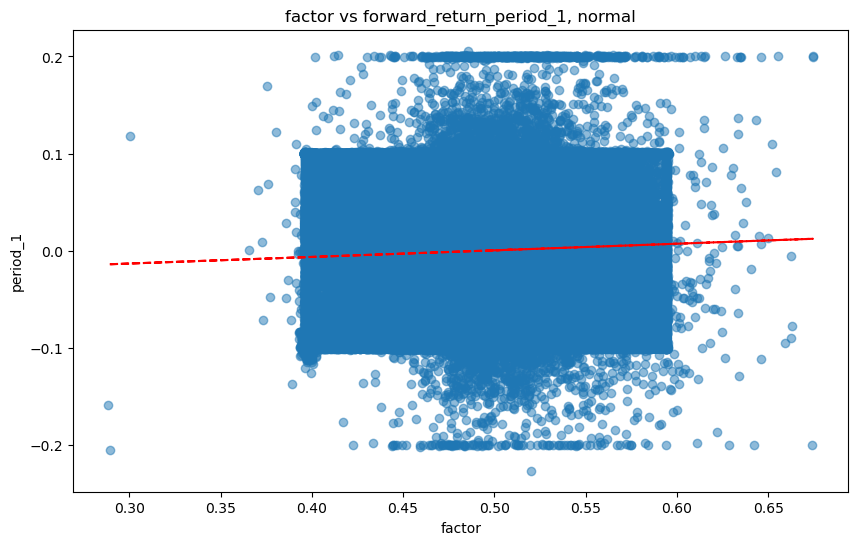

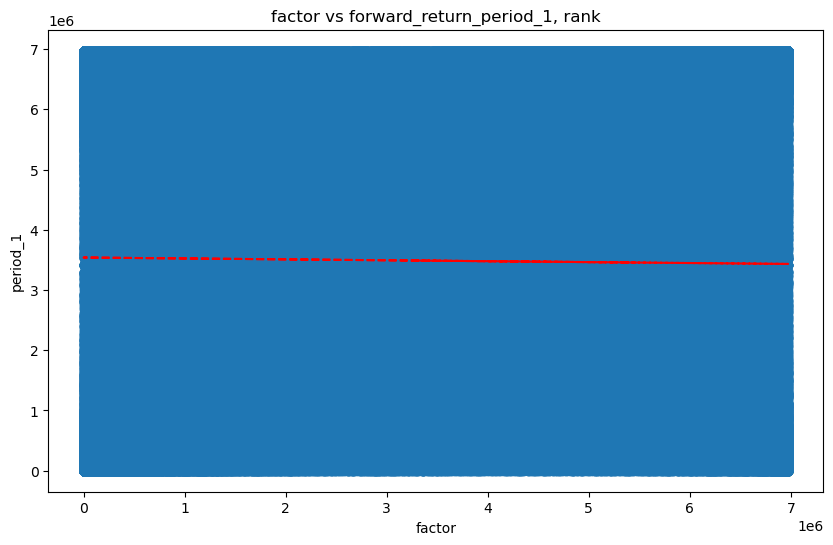

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

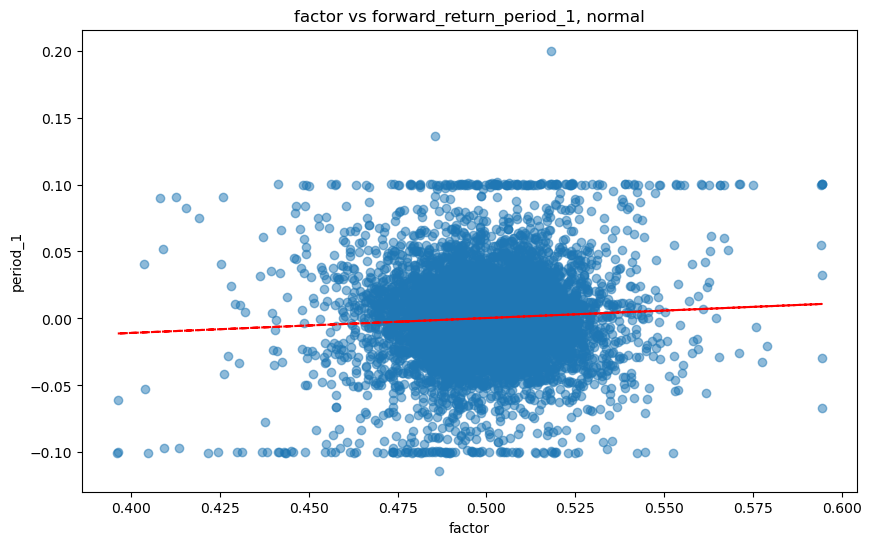

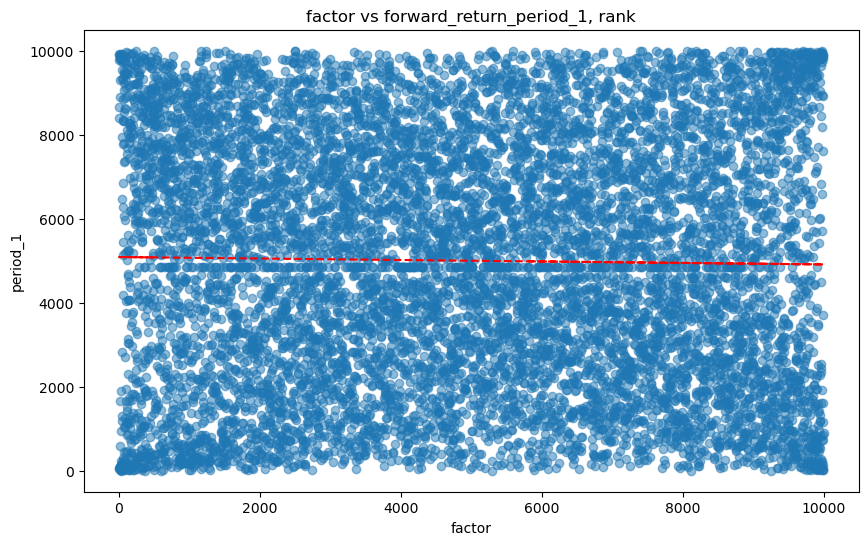

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

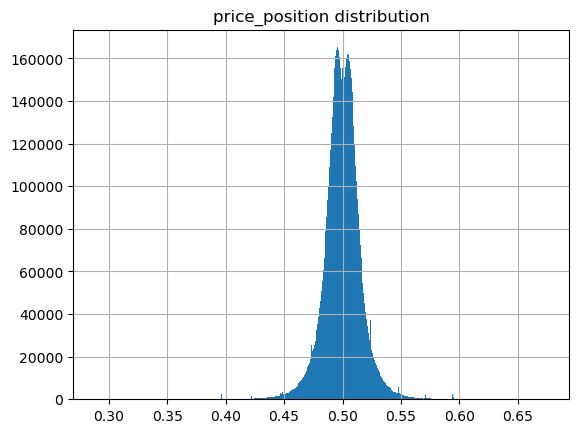

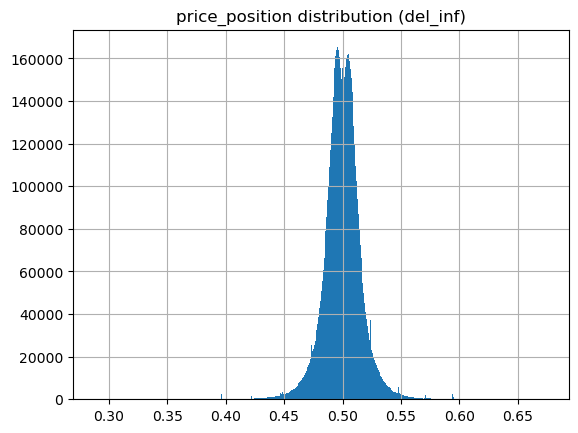

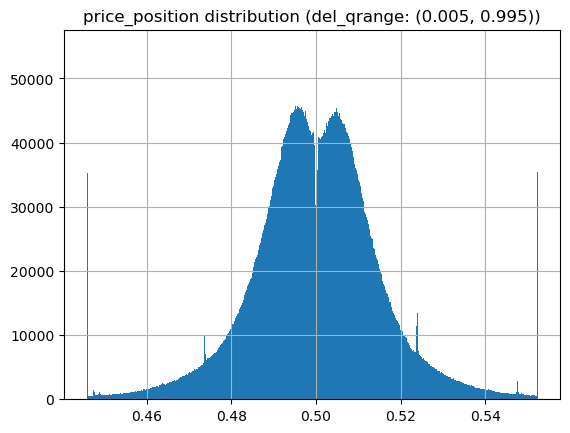

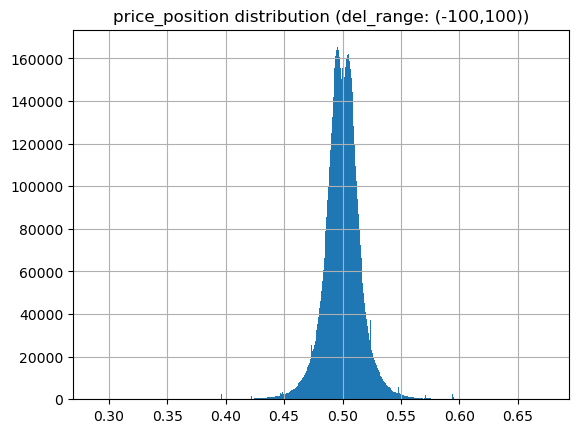

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-100,100))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.013053 -0.003859 -0.011362 -0.022254 -0.011939   
norm_ic_std           0.131513  0.123011  0.118123   0.11537  0.108667   
norm_ic_0.02_percent  0.862752  0.846298   0.84742  0.851907  0.830591   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.099256 -0.031374 -0.096188  -0.19289 -0.109865   
norm_abs_ic           0.037178  0.018271  0.009921 -0.002366  0.004231   
rank_ic_mean         -0.041152 -0.043302 -0.045132  -0.04987 -0.031916   
rank_ic_std           0.147972  0.137385  0.132601  0.131355  0.123917   
rank_ic_0.02_percent  0.881825   0.88893  0.875093   0.87472  0.854899   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir              -0.278107 -0.315191  -0.34036 -0.379658 -0.257556   
rank_abs_ic          -0.015237 -0.017504 -0.021873 -0.034487 -0.012028   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

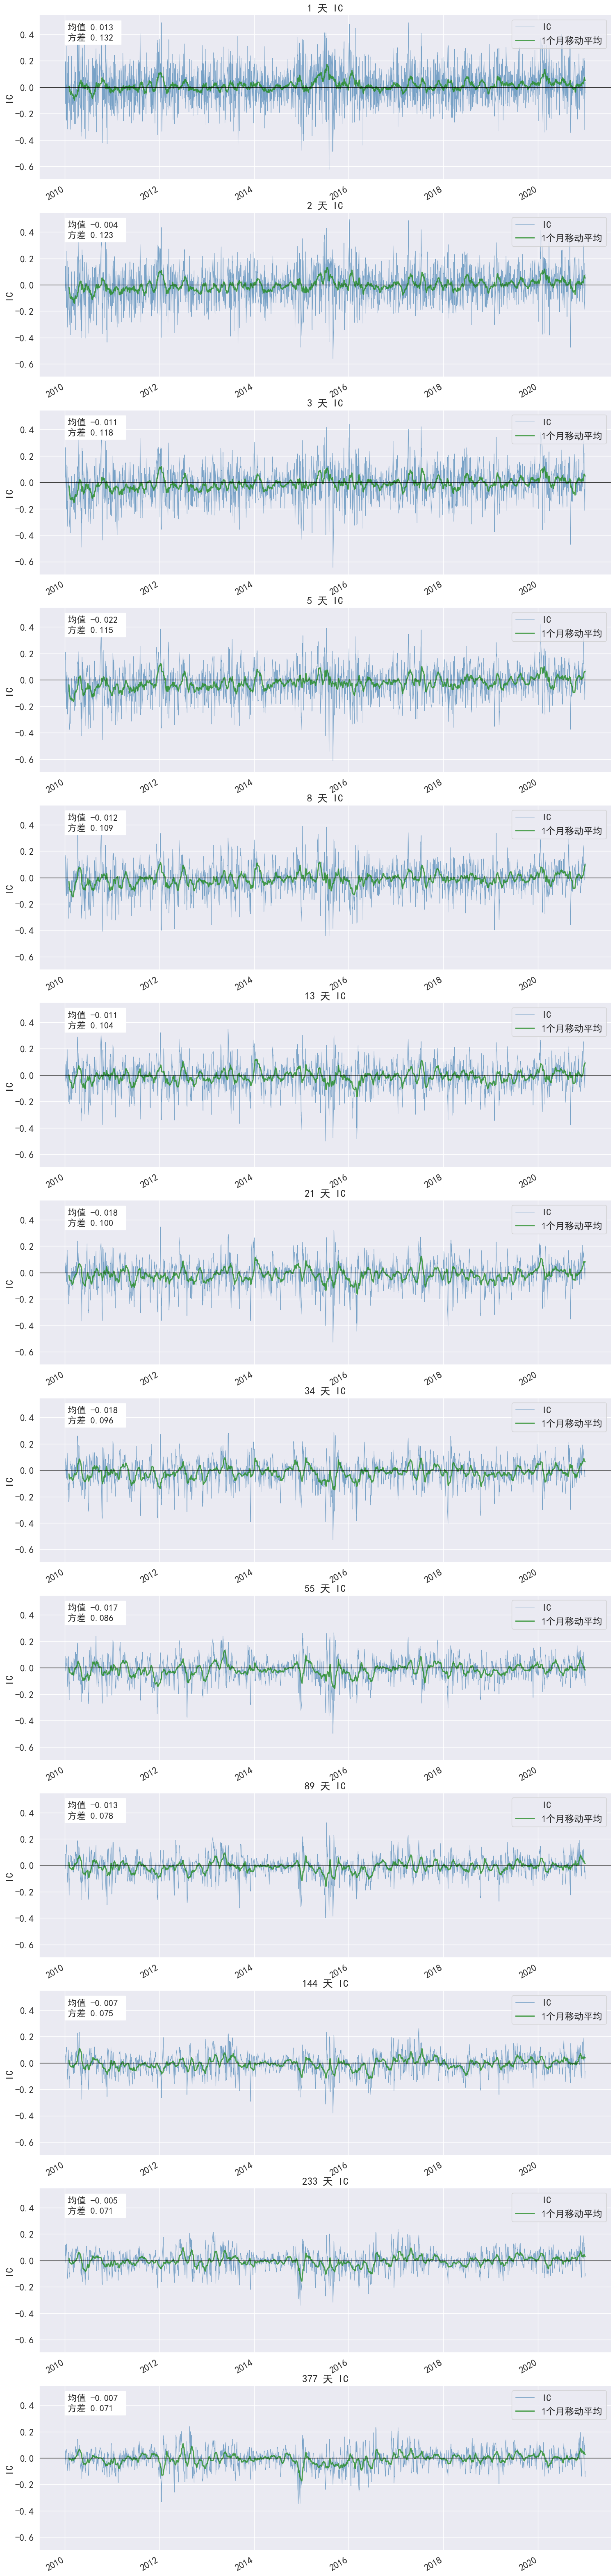

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

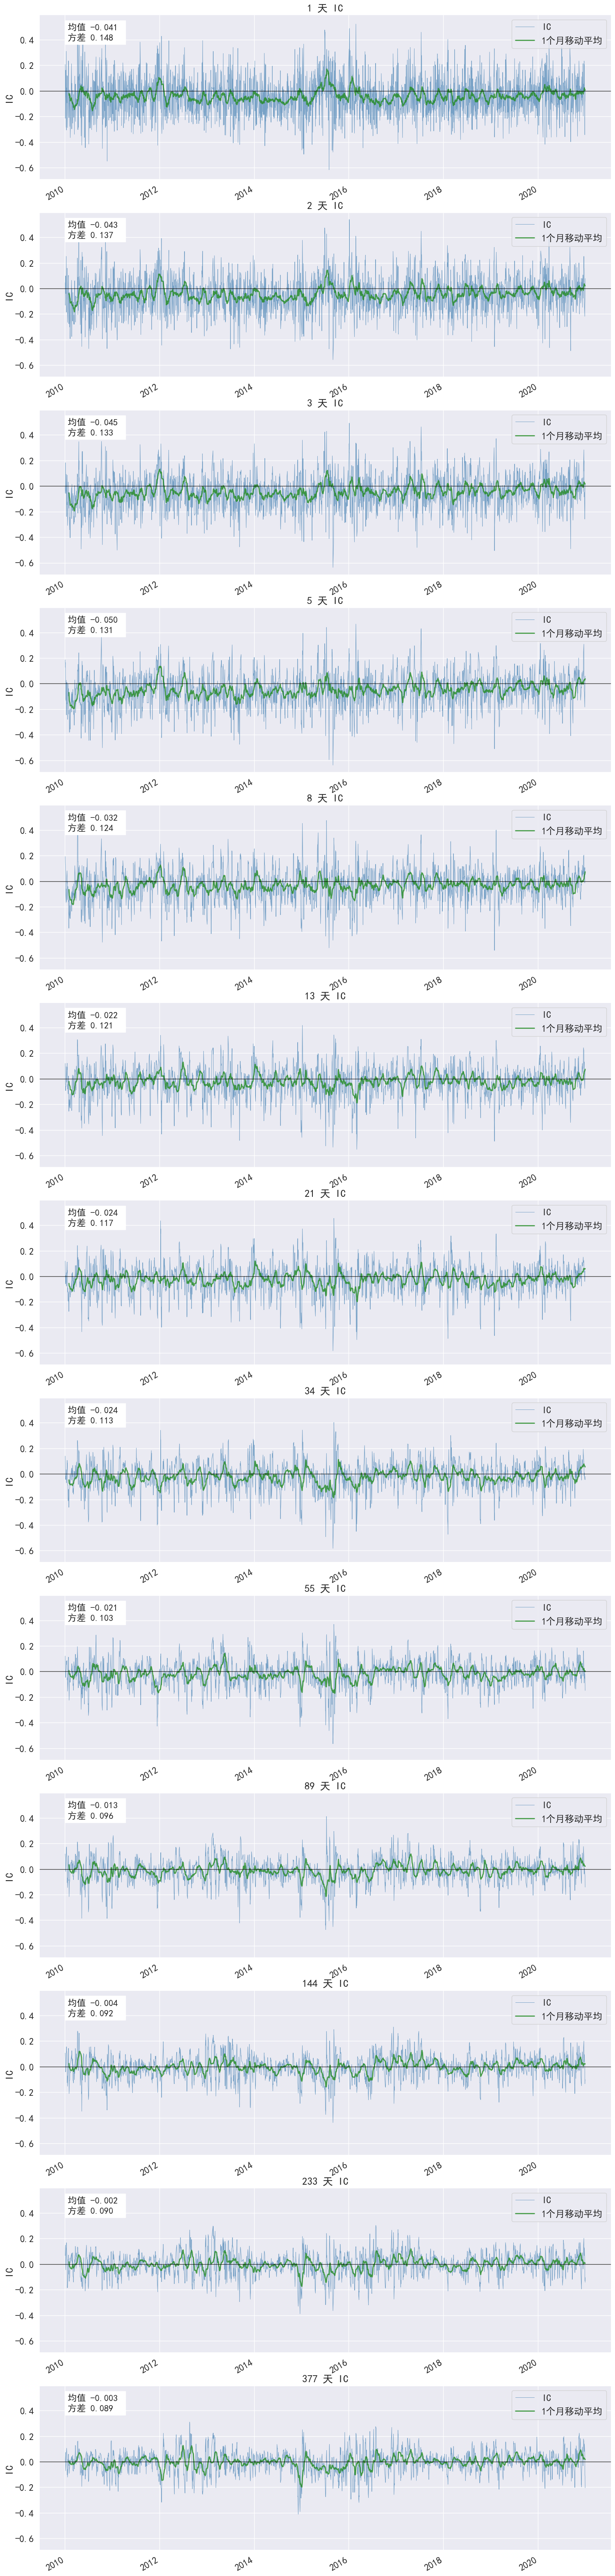

In [13]:
zy_fa.plot_rank_ic_ts()